In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cwd = os.getcwd()
order_products_train_df = pd.read_csv(cwd + '/data/order_products__train.csv')
order_products_prior_df = pd.read_csv(cwd + '/data/order_products__prior.csv')
orders_df = pd.read_csv(cwd + '/data/orders.csv')
products_df = pd.read_csv(cwd + '/data/products.csv')
aisles_df = pd.read_csv(cwd + '/data/aisles.csv')
departments_df = pd.read_csv(cwd + '/data/departments.csv')

In [14]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [161]:
orders_by_user = pd.DataFrame()
orders_by_user['n_orders'] = orders_df.groupby('user_id').size()
orders_by_user.head()

,n_orders
user_id,
1,11
2,15
3,13
4,6
5,5


Text(0.5, 0, 'Order Count')

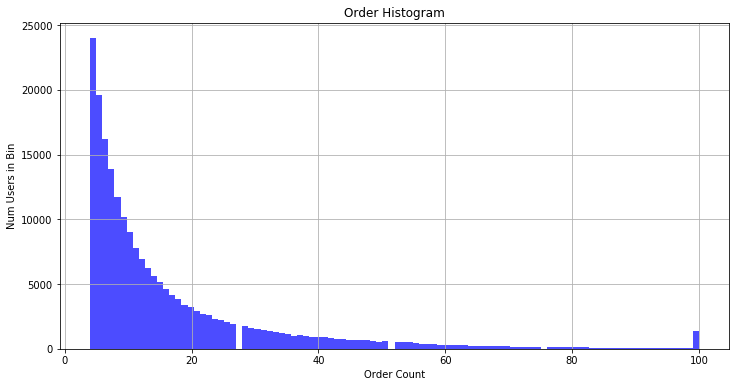

In [163]:
fig, ax = plt.subplots(figsize=(12, 6))
orders_by_user.n_orders.hist(bins=100, color='blue', alpha=0.7, ax=ax)
ax.set_title('Order Histogram')
ax.set_ylabel('Num Users in Bin')
ax.set_xlabel('Order Count')

Text(0.5, 0, 'Order Count')

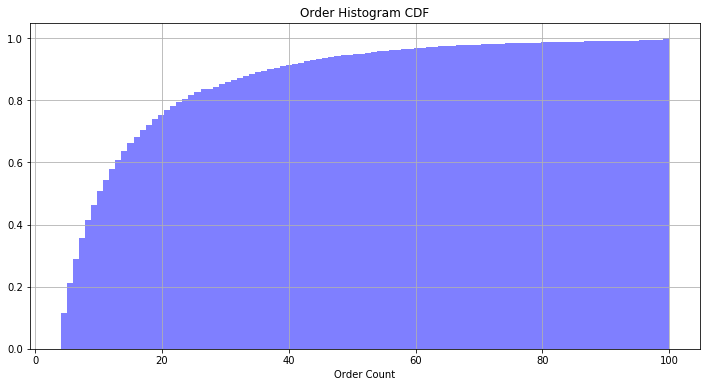

In [46]:
fig, ax = plt.subplots(figsize=(12, 6))
orders_by_user.order_number.hist(bins=100, color='blue', alpha=0.7,
                                 cumulative=True, density=True)
ax.set_title('Order Histogram CDF')
ax.set_xlabel('Order Count')

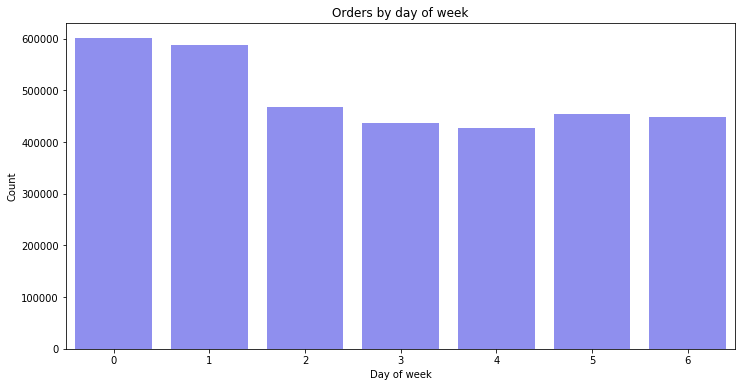

In [55]:
plt.subplots(figsize=(12, 6))
sns.countplot(x="order_dow", data=orders_df, color='blue', alpha=0.7)
plt.ylabel('Count')
plt.xlabel('Day of week')
plt.title("Orders by day of week")
plt.show()

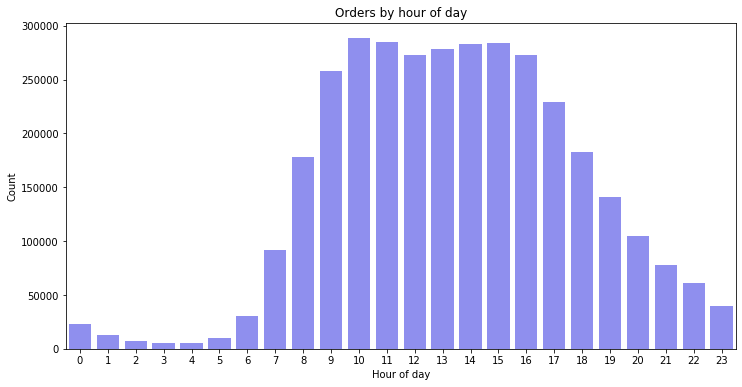

In [56]:
plt.subplots(figsize=(12, 6))
sns.countplot(x="order_hour_of_day", data=orders_df, color='blue', alpha=0.7)
plt.ylabel('Count')
plt.xlabel('Hour of day')
plt.title("Orders by hour of day")
plt.show()

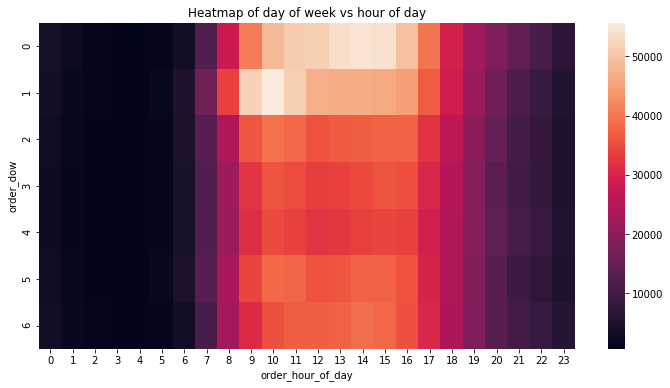

In [59]:
time_of_orders_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].agg("count").reset_index()
time_of_orders_df = time_of_orders_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12, 6))
sns.heatmap(time_of_orders_df)
plt.title("Heatmap of day of week vs hour of day")
plt.show()

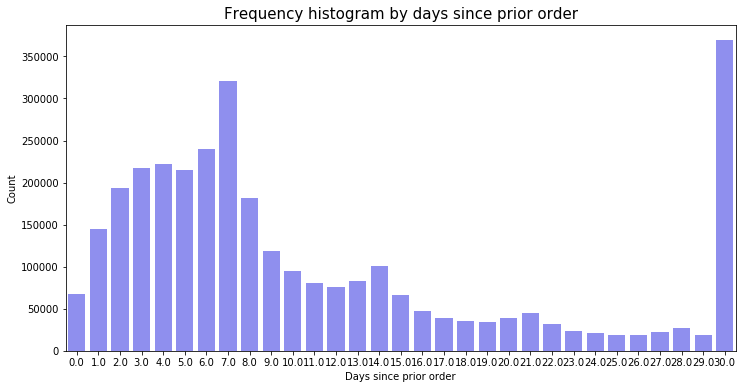

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(x="days_since_prior_order", data=orders_df, color='blue', alpha=0.7)
plt.ylabel('Count')
plt.xlabel('Days since prior order')
plt.title("Frequency histogram by days since prior order")
plt.show()

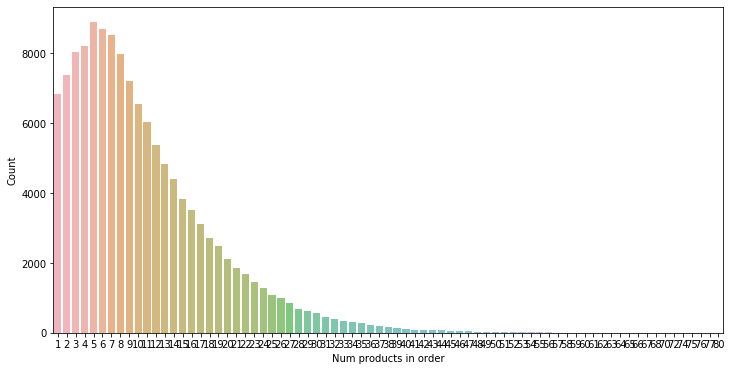

In [75]:
products_in_order_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].agg("max").reset_index()
cnt_srs = products_in_order_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.7)
plt.ylabel('Count')
plt.xlabel('Num products in order')
plt.show()

In [79]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


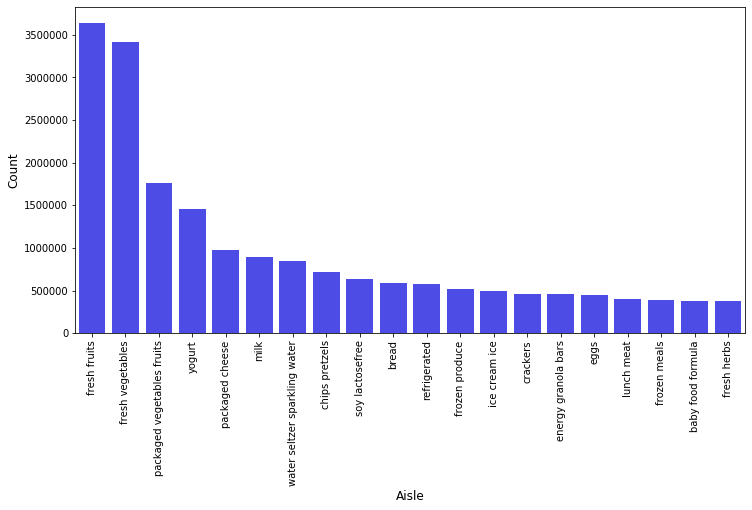

In [83]:
products_by_aisle = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(products_by_aisle.index, products_by_aisle.values, color='blue', alpha=0.7)
plt.ylabel('Count')
plt.xlabel('Aisle')
plt.xticks(rotation='vertical')
plt.show()

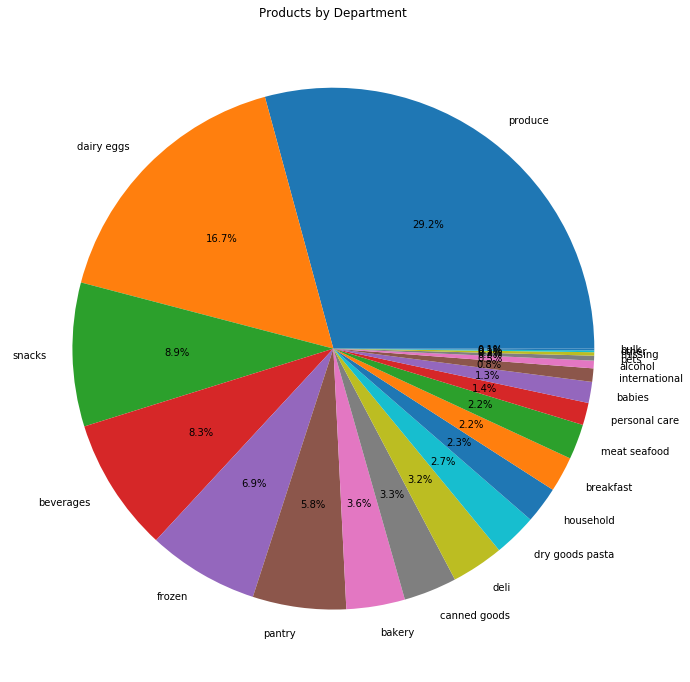

In [99]:
products_by_department = order_products_prior_df['department'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(products_by_department.values, labels=products_by_department.index, autopct='%1.1f%%')
plt.title("Products by Department")
plt.show()

In [104]:
user_products_encoder = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
user_products_encoder = pd.crosstab(user_products_encoder['user_id'], user_products_encoder['aisle'])
user_products_encoder.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [105]:
user_products_encoder.head(7)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(user_products_encoder)
pca_samples = pca.transform(user_products_encoder)

In [108]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [121]:
pca_samples[:, 1]

array([ 2.42942719, 36.75111652,  2.40438252, ...,  7.70129855,
       20.41873374,  6.64621817])

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=5, random_state=42).fit(pca_samples)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(pca_samples)
print(centers)

[[-19.53559107  -0.43783074  -0.2551505 ]
 [222.87843123 -37.80947065  -0.44098053]
 [ 84.00362726 -16.32997313   2.78862896]
 [ 19.02810004   2.35836945   0.34608579]
 [125.13231663  75.06273178  -2.36373303]]


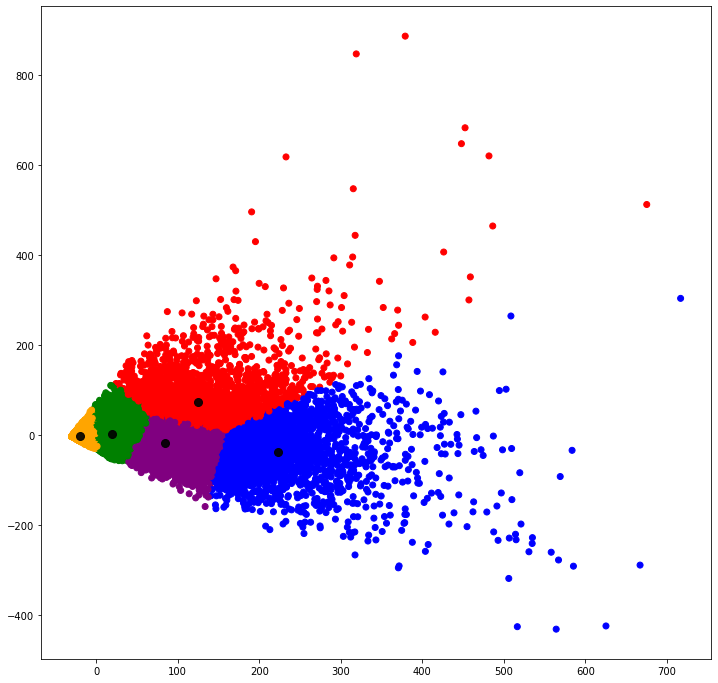

In [147]:
import matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
colors = ['orange', 'blue', 'purple', 'green', 'red']
colored = [colors[k] for k in c_preds]

ax.scatter(pca_samples[:, 0], pca_samples[:, 1],
           color=colored)
for ci,c in enumerate(centers):
    ax.plot(c[0], c[1], 'o', markersize=8, color='black', alpha=0.9, label=''+str(ci))
plt.show()

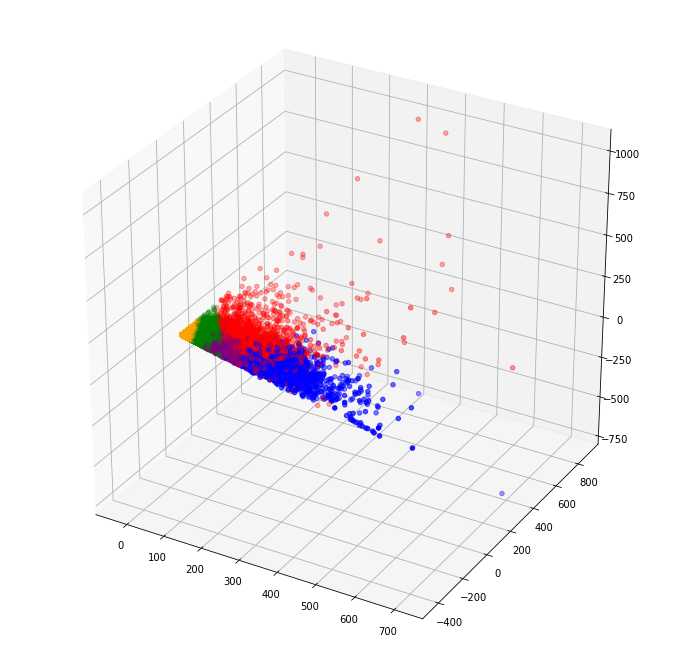

In [148]:
import matplotlib
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
colors = ['orange', 'blue', 'purple', 'green', 'red']
colored = [colors[k] for k in c_preds]

ax.scatter(pca_samples[:, 0], pca_samples[:, 1], pca_samples[:, 2],
           color=colored)
plt.show()

In [149]:
pd.merge(order_products_prior_df, orders_df, on='order_id', how='left').head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
